In [23]:
import pandas as pd
import datetime as dt
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

In [24]:
#Import data
#Original data and data dictionary can be found here: https://data.cityofnewyork.us/Transportation/2016-Green-Taxi-Trip-Data/hvrh-b6nb
url = '../../../final_project_data/2016_Green_Taxi_Trip_Data.csv'
dftaxi = pd.read_csv(url)


C:\Users\slai\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:

dftaxi.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,PULocationID,DOLocationID
0,2,01/01/2016 12:29:24 AM,01/01/2016 12:39:36 AM,N,1,-73.928642,40.680611,-73.924278,40.698044,1,...,0.5,1.86,0.0,NaN,0.3,11.16,1,1.0,NaN,NaN
1,2,01/01/2016 12:19:39 AM,01/01/2016 12:39:18 AM,N,1,-73.952675,40.723175,-73.923920,40.761379,1,...,0.5,0.00,0.0,NaN,0.3,16.8,2,1.0,NaN,NaN
2,2,01/01/2016 12:19:33 AM,01/01/2016 12:39:48 AM,N,1,-73.971611,40.676105,-74.013161,40.646072,1,...,0.5,4.45,0.0,NaN,0.3,22.25,1,1.0,NaN,NaN
3,2,01/01/2016 12:22:12 AM,01/01/2016 12:38:32 AM,N,1,-73.989502,40.669579,-74.000648,40.689034,1,...,0.5,0.00,0.0,NaN,0.3,14.8,2,1.0,NaN,NaN
4,2,01/01/2016 12:24:01 AM,01/01/2016 12:39:22 AM,N,1,-73.964729,40.682854,-73.940720,40.663013,1,...,0.5,0.00,0.0,NaN,0.3,13.3,2,1.0,NaN,NaN


In [4]:
#%% Ensure data quality. Do not have incorrect longitudes's in dataset. Returns empty dataframe!
dftaxi[dftaxi['Pickup_longitude'] > 0]   

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,PULocationID,DOLocationID


In [5]:
#%% QC to check the differences between latitudes/longitudes and response variable. 7M row discrepancy. 
dftaxi.count()

VendorID                 16385532
lpep_pickup_datetime     16385532
Lpep_dropoff_datetime    16385532
Store_and_fwd_flag       16385532
RateCodeID               16385532
Pickup_longitude          9018030
Pickup_latitude           9018030
Dropoff_longitude         9018030
Dropoff_latitude          9018030
Passenger_count          16385532
Trip_distance            16385532
Fare_amount              16385532
Extra                    16385532
MTA_tax                  16385532
Tip_amount               16385532
Tolls_amount             16385532
Ehail_fee                       0
improvement_surcharge    16385532
Total_amount             16385532
Payment_type             16385532
Trip_type                16385060
PULocationID              7367502
DOLocationID              7367502
dtype: int64

In [6]:
#%% Parse date from datetime
dftaxi['pickup_timestring'] = dftaxi['lpep_pickup_datetime'].apply(lambda x: x.split(" ")[0]) #pickup_timestring
dftaxi['dropoff_timestring'] = dftaxi['Lpep_dropoff_datetime'].apply(lambda x: x.split(" ")[0]) #dropoff_timestring
#%% Assign Response variable. The response variable is where there is both a pickup and a dropoff, thus showing a sucessful and completed ride. 
dftaxi['response_variable'] = np.where(dftaxi.pickup_timestring is not None & dftaxi.dropoff_timestring is not None, '1',0)
dftaxi.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,PULocationID,DOLocationID,pickup_timestring,dropoff_timestring,response_variable
0,2,01/01/2016 12:29:24 AM,01/01/2016 12:39:36 AM,N,1,-73.928642,40.680611,-73.924278,40.698044,1,...,NaN,0.3,11.16,1,1.0,NaN,NaN,01/01/2016,01/01/2016,1
1,2,01/01/2016 12:19:39 AM,01/01/2016 12:39:18 AM,N,1,-73.952675,40.723175,-73.923920,40.761379,1,...,NaN,0.3,16.8,2,1.0,NaN,NaN,01/01/2016,01/01/2016,1
2,2,01/01/2016 12:19:33 AM,01/01/2016 12:39:48 AM,N,1,-73.971611,40.676105,-74.013161,40.646072,1,...,NaN,0.3,22.25,1,1.0,NaN,NaN,01/01/2016,01/01/2016,1
3,2,01/01/2016 12:22:12 AM,01/01/2016 12:38:32 AM,N,1,-73.989502,40.669579,-74.000648,40.689034,1,...,NaN,0.3,14.8,2,1.0,NaN,NaN,01/01/2016,01/01/2016,1
4,2,01/01/2016 12:24:01 AM,01/01/2016 12:39:22 AM,N,1,-73.964729,40.682854,-73.940720,40.663013,1,...,NaN,0.3,13.3,2,1.0,NaN,NaN,01/01/2016,01/01/2016,1


In [7]:
#%% Check to ensure that all rows have a response variable
dftaxi[dftaxi['response_variable'] == '0'] 
#returns empty dataframe! 

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,PULocationID,DOLocationID,pickup_timestring,dropoff_timestring,response_variable


In [8]:
#%% Get month out of timestring
dftaxi['pickup_timestring_month'] = dftaxi['pickup_timestring'].apply(lambda x: x.split("/")[0]) #pickup_timestring_month
print(dftaxi.head())
#%% Get Day out of timestring
dftaxi['pickup_timestring_day'] = dftaxi['pickup_timestring'].apply(lambda x: x.split("/")[1]) #pickup_timestring_day

   VendorID    lpep_pickup_datetime   Lpep_dropoff_datetime  \
0         2  01/01/2016 12:29:24 AM  01/01/2016 12:39:36 AM   
1         2  01/01/2016 12:19:39 AM  01/01/2016 12:39:18 AM   
2         2  01/01/2016 12:19:33 AM  01/01/2016 12:39:48 AM   
3         2  01/01/2016 12:22:12 AM  01/01/2016 12:38:32 AM   
4         2  01/01/2016 12:24:01 AM  01/01/2016 12:39:22 AM   

  Store_and_fwd_flag  RateCodeID  Pickup_longitude  Pickup_latitude  \
0                  N           1        -73.928642        40.680611   
1                  N           1        -73.952675        40.723175   
2                  N           1        -73.971611        40.676105   
3                  N           1        -73.989502        40.669579   
4                  N           1        -73.964729        40.682854   

   Dropoff_longitude  Dropoff_latitude  Passenger_count  \
0         -73.924278         40.698044                1   
1         -73.923920         40.761379                1   
2         -74.013

In [9]:
#%% Subset to relevant columns.
dftaxi = dftaxi[['pickup_timestring','Passenger_count','Trip_distance','Total_amount','response_variable']]
print(dftaxi.head())
print(dftaxi.dtypes)

  pickup_timestring  Passenger_count  Trip_distance Total_amount  \
0        01/01/2016                1           1.46        11.16   
1        01/01/2016                1           3.56         16.8   
2        01/01/2016                1           3.79        22.25   
3        01/01/2016                1           3.01         14.8   
4        01/01/2016                1           2.55         13.3   

  response_variable  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
pickup_timestring     object
Passenger_count        int64
Trip_distance        float64
Total_amount          object
response_variable     object
dtype: object


In [10]:
#%% Convert to numeric

dftaxi[['Total_amount','response_variable']] = dftaxi[['Total_amount','response_variable']].convert_objects(convert_numeric=True) #deprecated, yet works
print(dftaxi.dtypes)

C:\Users\slai\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


pickup_timestring     object
Passenger_count        int64
Trip_distance        float64
Total_amount         float64
response_variable      int64
dtype: object


In [11]:
#%% Group by day
dftaxi_day = dftaxi[['pickup_timestring','Passenger_count','Trip_distance','Total_amount','response_variable']]
dftaxi_day = dftaxi_day.groupby(['pickup_timestring'],as_index=False).sum() 
print(dftaxi_day.head())
print(dftaxi_day.dtypes)
print('Number of rows in daily aggregated view', len(dftaxi_day))


  pickup_timestring  Passenger_count  Trip_distance   Total_amount  \
0        01/01/2016            91243      207873.29  979082.440001   
1        01/02/2016            64687      133957.87  656240.850000   
2        01/03/2016            60679      129856.68  633191.690000   
3        01/04/2016            59229      112022.19  603734.300000   
4        01/05/2016            56470      110158.20  593993.790000   

   response_variable  
0              64396  
1              46958  
2              44270  
3              43740  
4              42342  
pickup_timestring     object
Passenger_count        int64
Trip_distance        float64
Total_amount         float64
response_variable      int64
dtype: object
Number of rows in daily aggregated view 366


In [12]:
#%% Convert to date_time and set index
dftaxi_day[['pickup_timestring']]= pd.to_datetime(dftaxi_day['pickup_timestring'])
dftaxi_day.set_index('pickup_timestring',inplace=True)

In [13]:
dftaxi_day.head()

,Passenger_count,Trip_distance,Total_amount,response_variable
pickup_timestring,,,,
2016-01-01,91243,207873.29,979082.440001,64396
2016-01-02,64687,133957.87,656240.850000,46958
2016-01-03,60679,129856.68,633191.690000,44270
2016-01-04,59229,112022.19,603734.300000,43740
2016-01-05,56470,110158.20,593993.790000,42342


In [14]:
#%% Export clean file to CSV
path = '..\Data\dftaxi_by_day.csv'
dftaxi_day.to_csv(path,sep=',',index=True,header=True)

In [15]:
#Import clean file. 
url = '..\Data\dftaxi_by_day.csv'
dftaxi_day = pd.read_csv(url)
dftaxi_day.head()

,pickup_timestring,Passenger_count,Trip_distance,Total_amount,response_variable
0,2016-01-01,91243,207873.29,979082.440001,64396
1,2016-01-02,64687,133957.87,656240.850000,46958
2,2016-01-03,60679,129856.68,633191.690000,44270
3,2016-01-04,59229,112022.19,603734.300000,43740
4,2016-01-05,56470,110158.20,593993.790000,42342


In [16]:
#Set index again, just to be sure. 
dftaxi_day.set_index('pickup_timestring',inplace=True)
dftaxi_day.head()

,Passenger_count,Trip_distance,Total_amount,response_variable
pickup_timestring,,,,
2016-01-01,91243,207873.29,979082.440001,64396
2016-01-02,64687,133957.87,656240.850000,46958
2016-01-03,60679,129856.68,633191.690000,44270
2016-01-04,59229,112022.19,603734.300000,43740
2016-01-05,56470,110158.20,593993.790000,42342


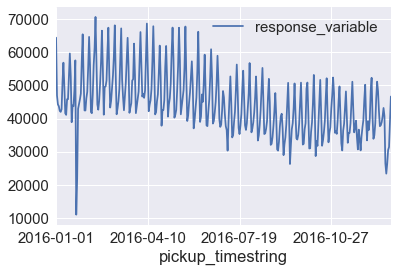

In [37]:
#%% Trends in daily data. Defaults to index for x. Data follows a cyclical pattern, should be autocorrelated. 
dftaxi_day.plot(y='response_variable',kind='line')



In [18]:
#%% Train/Test Split
dftaxi_day = dftaxi_day[['response_variable']].astype(float)
n = len(dftaxi_day.response_variable)

train = dftaxi_day.response_variable[:int(.75*n)]
test = dftaxi_day.response_variable[int(.75*n):]

C:\Users\slai\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


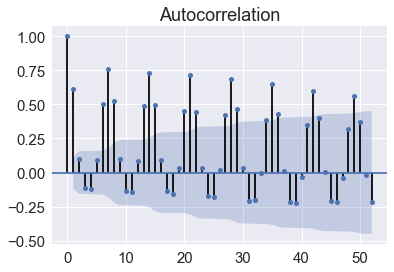

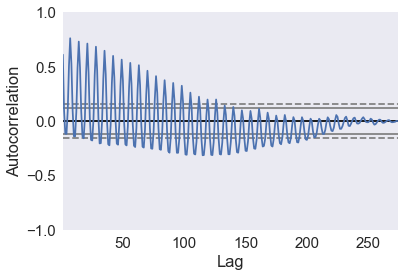

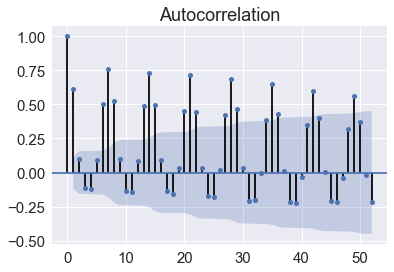

In [19]:
%matplotlib inline
from pandas.plotting import autocorrelation_plot
#Decreasing lag suggests highly autocorrelated dataset
plot_acf = autocorrelation_plot(train)

#find ideal lag. Cyclical spikes means we have a cycle
from statsmodels.graphics.tsaplots import plot_acf
#from pandas.core import datetools
plot_acf(train, lags=52)

In [20]:
#%% Train autocorrelation
print (train.autocorr(lag=1)) # 0.61
print (train.autocorr(lag=7)) # 0.78
print (train.autocorr(lag=21)) # 0.76, Works better than 7
print (train.autocorr(lag=52)) # -0.27

0.615076924988
0.778806908884
0.763325870277
-0.271619345939


                              ARMA Model Results                              
Dep. Variable:      response_variable   No. Observations:                  274
Model:                     ARMA(1, 0)   Log Likelihood               -2825.004
Method:                       css-mle   S.D. of innovations           7262.061
Date:                Thu, 16 Nov 2017   AIC                           5656.007
Time:                        21:23:28   BIC                           5666.847
Sample:                    01-01-2016   HQIC                          5660.358
                         - 09-30-2016                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4.669e+04   1139.445     40.972      0.000    4.45e+04    4.89e+04
ar.L1.response_variable     0.6171      0.048     12.919      0.000       0.524       0.711


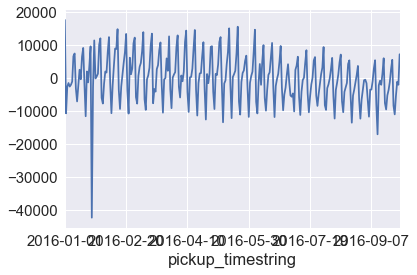

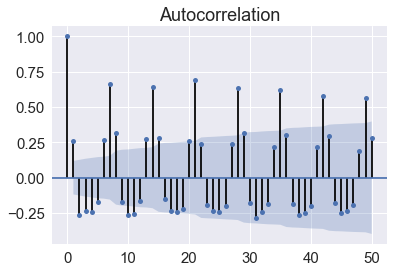

In [21]:
#%% Train stationarity
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
model = ARMA(train, (1, 0)).fit()
print(model.summary())
#Matches autocorr(1), therefore stationary dataset!
#%  Train Residuals for AR(1)
type(model.resid)
print(model.resid.plot())
print(plot_acf(model.resid, lags = 50))

C:\Users\slai\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
Figure(432x288)
Mean absolute error:  39474.3556528


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      response_variable   No. Observations:                  274
Model:                     ARMA(1, 0)   Log Likelihood               -2825.004
Method:                       css-mle   S.D. of innovations           7262.061
Date:                Thu, 16 Nov 2017   AIC                           5656.007
Time:                        22:07:38   BIC                           5666.847
Sample:                    01-01-2016   HQIC                          5660.358
                         - 09-30-2016                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4.669e+04   1139.445     40.972      0.000    4.45e+04    4.89e+04
ar.L1.response_variable     0.6171      0.048     12.919      0.000       0.524       0.711
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6204           +0.0000j            1.6204            0.0000
-----------------------------------------------------------------------------
"""

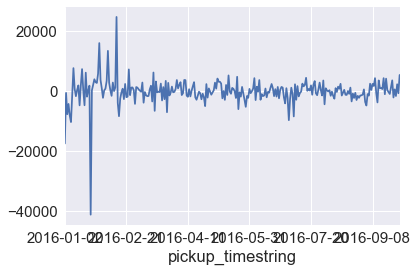

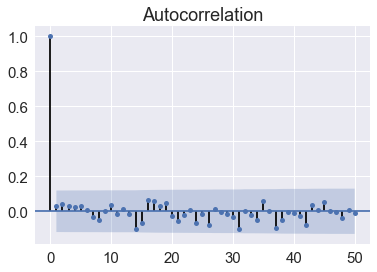

In [51]:
#%% Plot error. Low and random error suggest an accurate model
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

arima_model = ARIMA(train, (21,1,1)).fit()
arima_model.summary()
print(arima_model.resid.plot())
print(plot_acf(arima_model.resid, lags = 50))

predictions = arima_model.predict(
    '2016-10-01',
    '2016-12-31',
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

In [58]:
print(test.mean())
print(train.mean())
print(predictions.mean())

39401.565217391304
46571.48905109489
-72.79043538828505
